In [1]:
import torch
from torch import nn
from ccn import Constraint, ConstraintsGroup, Clause, ClausesGroup
import matplotlib.pyplot as plt
import networkx as nx

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [2]:
constraints = ConstraintsGroup('constraints/full')
print(len(constraints))

clauses = ClausesGroup.from_constraints_group(constraints)
print(len(clauses))

constraints = clauses.stratify(range(41))
print(len(constraints))

lens = [len(group) for group in constraints]
print(lens)
print(sum(lens))
print(constraints[0])

243
243
22
[3, 2, 3, 4, 5, 6, 7, 8, 10, 9, 10, 11, 54, 16, 23, 7, 12, 22, 17, 4, 4, 12]
249
n1 :- 0
n36 :- 30
n36 :- 35


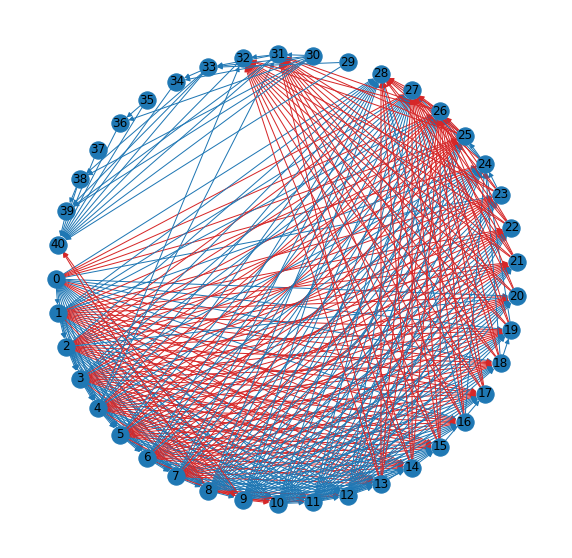

In [3]:
#constraints = ConstraintsGroup('./constraints/full')
aux = ConstraintsGroup([])
for group in constraints:
  aux = aux + group 

G = aux.graph()

plt.figure(figsize=(10, 10))
ax = plt.subplot()
color_map = ['tab:blue' if G[edge[0]][edge[1]]['body'] else 'tab:red' for edge in G.edges()]
nx.draw_shell(G, with_labels=True, edge_color=color_map)
plt.show()


